In [1]:
import numpy as np
import yaml

In [5]:
import sys
sys.path.append('../src/')
# from filter_utils import *
from stacker import SimulationStacker
import h5py

In [4]:
# stacker = SimulationStacker('Illustris-2', 103, z=0.5, simType='IllustrisTNG')
stacker = SimulationStacker('m50n512', 125, z=0.5, simType='SIMBA', feedback='s50')

In [6]:
keys = ['Coordinates', 'Masses']
snapPath = stacker.simPath + 'snapshots/snap_' + stacker.sim + '_' + str(stacker.snapshot) + '.hdf5'
f = h5py.File(snapPath, 'r')

In [15]:
BH_Mass = f['PartType5']['BH_Mass'][:]
BH_Masses = f['PartType5']['Masses'][:]

In [16]:
BH_Mass

array([1.3989605e-03, 2.3902713e-03, 1.0000000e-06, ..., 1.0000000e-06,
       9.1273239e-04, 1.4456968e-03], dtype=float32)

In [18]:
BH_Masses/BH_Mass

array([  1.0003381,  34.93331  , 775.77765  , ..., 862.47656  ,
         1.0017864,   3.0142245], dtype=float32)

In [11]:
f['PartType5'].keys()

<KeysViewHDF5 ['AGS-Softening', 'BH_AccretionLength', 'BH_Mass', 'BH_Mass_AlphaDisk', 'BH_Mdot', 'BH_NProgs', 'Coordinates', 'HaloID', 'ID_Generations', 'Masses', 'ParticleIDs', 'Potential', 'StellarFormationTime', 'Velocities']>

In [16]:
mapVisual= stacker.loadData('gas', nPixels=580, projection='xy', type='map')

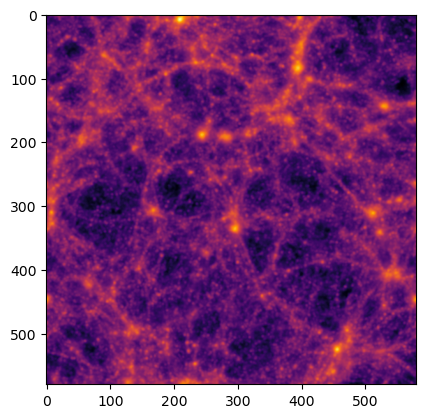

In [19]:
import matplotlib.pyplot as plt
plt.imshow(mapVisual, norm='log', cmap='inferno')
plt.show()

In [15]:
(halos['GroupPos']/stacker.header['BoxSize']) * 1000  # convert to box units

array([[ 14.463203, 361.82144 , 255.64474 ],
       [145.02927 , 682.1876  , 633.30176 ],
       [581.6021  , 509.91602 , 942.7786  ],
       ...,
       [ 95.10787 ,  45.765602, 944.87585 ],
       [ 21.018118, 963.9844  , 877.64465 ],
       [ 93.303635, 970.8806  , 966.2513  ]], dtype=float32)

In [12]:
halos['GroupPos'].max()

74999.95

In [2]:
yaml_path = "configs/config_z05.yaml"

with open(yaml_path) as f:
    config = yaml.safe_load(f)

In [4]:
config['simulations']

[{'sim_type': 'SIMBA',
  'sims': [{'name': 'm50n512', 'snapshot': 125, 'feedback': 's50'},
   {'name': 'm50n512', 'snapshot': 125, 'feedback': 's50noagn'},
   {'name': 'm50n512', 'snapshot': 125, 'feedback': 's50nox'},
   {'name': 'm50n512', 'snapshot': 125, 'feedback': 's50nojet'},
   {'name': 'm50n512', 'snapshot': 125, 'feedback': 's50nofb'}]},
 {'sim_type': 'IllustrisTNG',
  'sims': [{'name': 'TNG100-1', 'snapshot': 67},
   {'name': 'TNG300-2', 'snapshot': 67},
   {'name': 'Illustris-2', 'snapshot': 103}]}]

In [ ]:
for sim in config['simulations']:
    for s in sim['sims']:
        if 'redshift' not in s:
            s['redshift'] = config['redshift']
        if 'filter_type' not in s:
            s['filter_type'] = config['filter_type']
        if 'fig_path' not in s:
            s['fig_path'] = config['fig_path']
        if 'sim_type' not in s:
            s['sim_type'] = sim['sim_type']
import argparse 

{'sim_type': 'SIMBA', 'sims': [{'name': 'm50n512', 'snapshot': 125, 'feedback': ['s50', 's50noagn', 's50nox', 's50nojet', 's50nofb']}]}
{'sim_type': 'IllustrisTNG', 'sims': [{'name': 'TNG100-1', 'snapshot': 67}, {'name': 'TNG300-2', 'snapshot': 67}, {'name': 'Illustris-2', 'snapshot': 103}]}


In [ ]:
config['simulations'][0]['sim_type']